In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# Organize data into train, valid, test dirs
os.chdir("C:/Users/haroo/flowersdat/flowers")
if os.path.isdir('train/daisy') is False:
    os.makedirs('train/daisy')
    os.makedirs('train/dandelion')
    os.makedirs('train/rose')
    os.makedirs('train/sunflower')
    os.makedirs('train/tulip')
    os.makedirs('test/daisy')
    os.makedirs('test/dandelion')
    os.makedirs('test/rose')
    os.makedirs('test/sunflower')
    os.makedirs('test/tulip')
    os.makedirs('valid/daisy')
    os.makedirs('valid/dandelion')
    os.makedirs('valid/rose')
    os.makedirs('valid/sunflower')
    os.makedirs('valid/tulip')

In [3]:
train_path = 'C:/Users/haroo/flowersdat/flowers/train'
valid_path = 'C:/Users/haroo/flowersdat/flowers/test'
test_path = 'C:/Users/haroo/flowersdat/flowers/valid'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['daisy', 'dandelion', "rose", "sunflower", "tulip"], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['daisy', 'dandelion', "rose", "sunflower", "tulip"], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['daisy', 'dandelion', "rose", "sunflower", "tulip"], batch_size=10, shuffle=False)

Found 2607 images belonging to 5 classes.
Found 1287 images belonging to 5 classes.
Found 429 images belonging to 5 classes.


In [5]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

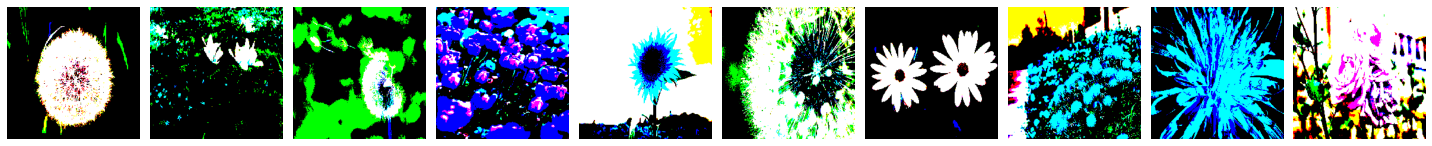

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=5, activation='softmax')
])

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)


Epoch 1/10
261/261 - 139s - loss: 34.4099 - accuracy: 0.4338 - val_loss: 7.5076 - val_accuracy: 0.4561
Epoch 2/10
261/261 - 143s - loss: 1.6905 - accuracy: 0.7522 - val_loss: 3.8375 - val_accuracy: 0.4786
Epoch 3/10
261/261 - 142s - loss: 0.2745 - accuracy: 0.9248 - val_loss: 3.7604 - val_accuracy: 0.4996
Epoch 4/10
261/261 - 142s - loss: 0.0434 - accuracy: 0.9862 - val_loss: 3.4273 - val_accuracy: 0.5175
Epoch 5/10
261/261 - 142s - loss: 0.0051 - accuracy: 0.9996 - val_loss: 3.4426 - val_accuracy: 0.5276
Epoch 6/10
261/261 - 141s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.5617 - val_accuracy: 0.5307
Epoch 7/10
261/261 - 140s - loss: 9.2220e-04 - accuracy: 1.0000 - val_loss: 3.4657 - val_accuracy: 0.5291
Epoch 8/10
261/261 - 140s - loss: 6.5383e-04 - accuracy: 1.0000 - val_loss: 3.4958 - val_accuracy: 0.5291
Epoch 9/10
261/261 - 141s - loss: 4.9817e-04 - accuracy: 1.0000 - val_loss: 3.5249 - val_accuracy: 0.5276
Epoch 10/10
261/261 - 141s - loss: 3.9846e-04 - accuracy: 1.0000 - va